In [138]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

In [8]:
data = pd.read_csv('../datasets/dataset.csv', index_col=0)

In [10]:
y = data['Red_Win'].astype(int).tolist()

In [26]:
data.isnull().sum()

Red_Win           0
Blue_Win          0
Red_Champions     0
Blue_Champions    0
dtype: int64

In [12]:
temp_data = data[['Red_Champions','Blue_Champions']].to_numpy()

In [117]:
X = []
for sublist in temp_data:
    concatenated_list = eval(sublist[0]) + eval(sublist[1])
    X.append(concatenated_list)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [119]:
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)
log_reg_predictions = log_reg_model.predict(X_test)

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)


models = {
    'Logistic Regression Classification': log_reg_predictions,
    'Decision Tree Classification': tree_predictions,
    'Random Forest Classification': rf_predictions,
    'SVM Classification': svm_predictions,
    'Gradient Boosting Classification': gb_predictions,
}

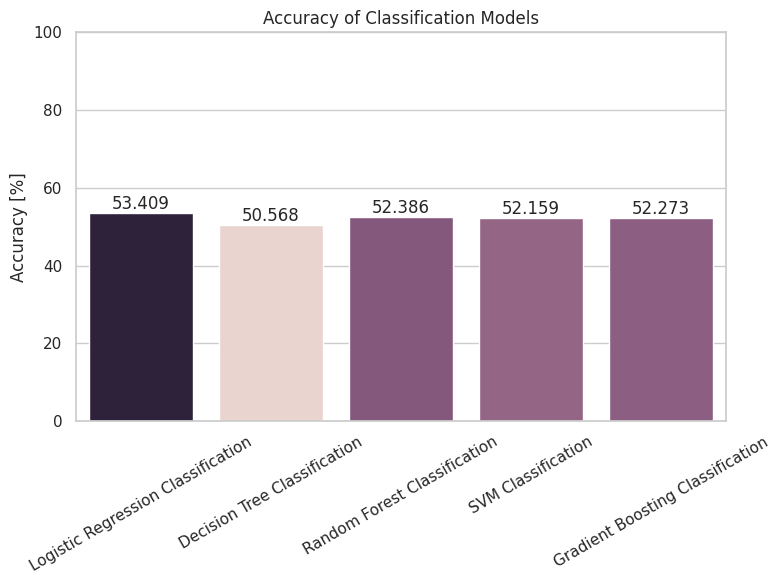

In [120]:
accuracies = {model_name: accuracy_score(y_test, y_pred)*100 for model_name, y_pred in models.items()}

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), hue=list(accuracies.values()))
plt.title('Accuracy of Classification Models')
plt.ylabel('Accuracy [%]')

for i, v in enumerate(accuracies.values()):
    ax.text(i, v, str(round(v, 3)), ha='center', va='bottom')
plt.ylim(0.0, 100.0)
ax.legend_.remove()
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [146]:
param_grid = {
    'Logistic Regression': {'model': LogisticRegression(), 'params': {'C': [0.001, 0.01, 0.1, 1, 10, 100]}},
    'Random Forest': {'model': RandomForestClassifier(), 'params': {'n_estimators': [50, 100, 200, 400], 'max_depth': [None, 5, 10, 20, 40], 'min_samples_split': [2, 5, 10]}},
    'SVM': {'model': SVC(), 'params': {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-3, 2, 6)}},
    'Gradient Boosting': {'model': GradientBoostingClassifier(), 'params': {'n_estimators': [50, 100, 200, 400], 'learning_rate': [0.01, 0.1, 0.5]}}
}

accuracy_scorer = make_scorer(accuracy_score)
f1_micro_scorer = make_scorer(f1_score, average='micro')

best_params = {}
best_accuracy_scores = {}
best_f1_scores = {}

for model_name, model_params in param_grid.items():
    grid_search = GridSearchCV(model_params['model'], model_params['params'], cv=5, n_jobs=-1, scoring={'accuracy': accuracy_scorer, 'f1_micro': f1_micro_scorer}, refit='accuracy')
    grid_search.fit(X_train, y_train)
    best_params[model_name] = grid_search.best_params_
    best_accuracy_scores[model_name] = grid_search.best_score_
    best_f1_scores[model_name] = f1_score(y_train, grid_search.best_estimator_.predict(X_train), average='micro')

for model_name in best_params.keys():
    print(f"Model: {model_name}")
    print(f"Best parameters: {best_params[model_name]}")
    print(f"Accuracy: {best_accuracy_scores[model_name]}")
    print(f"F1 Score (micro): {best_f1_scores[model_name]}\n")

Model: Logistic Regression
Best parameters: {'C': 0.001}
Accuracy: 0.5343103438637291
F1 Score (micro): 0.5401238468343232

Model: Random Forest
Best parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 400}
Accuracy: 0.5430305242250748
F1 Score (micro): 0.5825856186023

Model: SVM
Best parameters: {'C': 0.001, 'gamma': 0.001}
Accuracy: 0.5360798560559293
F1 Score (micro): 0.5360798685707064

Model: Gradient Boosting
Best parameters: {'learning_rate': 0.01, 'n_estimators': 200}
Accuracy: 0.5407560417936147
F1 Score (micro): 0.5612283583975736



The best resuts can be found using the Random Forest classifier so I will be using that model in the future.